In [1]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml

from MopsTracker import MopsTracker
from MopsParameters import MopsParameters

% matplotlib inline

In [2]:
dbname = 'fullsky5year.db'

In [3]:
con = sql.connect(dbname)

In [4]:
mjd_s = '51029'
mjd_f = '51038'

In [5]:
ssmids = pd.read_sql_query("""
SELECT DISTINCT ssmid FROM noAstromErr
WHERE (mjd BETWEEN %s AND %s) AND (dec BETWEEN -28.0 and -24.0) AND (ra BETWEEN 220 AND 228)
""" % (mjd_s, mjd_f), con)

In [6]:
len(ssmids['ssmid'])

8681

In [7]:
num_ssm = random.sample(ssmids['ssmid'], 800)
sample = ""
for i in num_ssm:
    sample += str(i) + ', '
    
sample = '(' + sample[0:-2] + ')'

In [8]:
print sample

(3616257, 8052185, 7170692, 992221, 343471, 10757869, 1815491, 7322823, 5968154, 2300962, 6644705, 6121694, 1271158, 1476650, 6669254, 4836921, 5811644, 5295473, 5342271, 9788561, 4956828, 4467723, 5886808, 5262575, 1630246, 10704889, 4420777, 5728394, 4646879, 4085723, 3516520, 8240533, 1219637, 8340953, 4198407, 8053273, 4956695, 5718832, 4324179, 4681835, 4788604, 1079627, 10201180, 6026524, 10038991, 893270, 1725854, 7727601, 581162, 8685449, 2060360, 8055767, 5138966, 3662733, 4409581, 5836233, 3207068, 2410181, 10004489, 8360179, 2848060, 1036730, 379664, 8986022, 1864833, 479327, 7529970, 10759230, 2291031, 4089634, 10157190, 8309077, 1578464, 8432432, 1611980, 7354779, 3419843, 7020259, 3765320, 7797068, 7616407, 4754608, 7598888, 3806280, 9059994, 9476459, 7216915, 5902911, 4890525, 6677939, 10691330, 8191410, 4540861, 8716786, 6450323, 1272883, 8573639, 5424811, 1076674, 5383606, 6997959, 8625744, 4403022, 2313766, 2872110, 1130253, 461663, 8209632, 1232319, 7122336, 1406370,

In [9]:
objs = pd.read_sql_query("""
SELECT * FROM noAstromErr
WHERE ssmid IN %s AND (mjd BETWEEN %s AND %s) AND (dec BETWEEN -28.0 and -24.0) AND (ra BETWEEN 220 AND 228)
""" % (sample, mjd_s, mjd_f), con)

In [10]:
objs

,diaid,obshistid,ssmid,ra,dec,mjd,mag,snr
0,493593,88651115,2036458,223.753710,-24.465168,51029.962617,15.082859,2027.993153
1,493609,88651115,2381739,225.690871,-24.969101,51029.962617,19.001297,54.915007
2,493642,88651115,3075645,224.977543,-24.602054,51029.962617,21.057219,8.266514
3,493694,88651115,4010250,223.409463,-24.193456,51029.962617,20.870291,9.819597
4,493873,88651115,8360179,225.160176,-24.979455,51029.962617,21.262581,6.841913
5,493895,88651115,8966665,225.079543,-24.423780,51029.962617,21.006732,8.659985
6,493901,88651115,9038425,226.368450,-24.649109,51029.962617,20.016753,21.553051
7,493957,88651116,503950,226.109386,-25.105427,51029.963067,21.040959,8.422214
8,493996,88651116,1476650,226.074038,-26.096635,51029.963067,21.393714,6.085897
9,494033,88651116,2381739,225.691001,-24.969128,51029.963067,19.001304,55.117360


In [11]:
objs.to_csv("mopsPresentation.txt", sep=" ", header=False, index=False)

In [12]:
! rm -rf mopsPresentation/nightly/
! rm -rf mopsPresentation/obshist/
! mkdir mopsPresentation/nightly
! mkdir mopsPresentation/obshist

In [13]:
! python $MOPS_DIR/bin/splitByNight.py mopsPresentation/mopsPresentation.txt mopsPresentation/nightly mopsPresentation/obshist

In [14]:
! rm -rf mopsPresentation/run/

In [15]:
! python runMops.py mopsPresentation/nightly mopsPresentation/run 

------- Run MOPS -------
Running LSST's Moving Object Pipeline

------- MOPS Parameters --------
Current Parameter Values:

---- findTracklets ----
	Maximum velocity:                         0.5
	Minimum velocity:                         0.0
---- collapseTracklets ----
	Right Ascension tolerance:                0.002
	Declination tolerance:                    0.002
	Angular tolerance:                        5
	Velocity tolerance:                       0.05
	Method:                                   greedy
	Use RMS filter:                           True
	Maximum RMS:                              0.0005
---- purifyTracklets ----
	Maximum RMS:                              0.0005
---- removeSubsets ----
	Remove subsets:                           True
	Keep only longest:                        True
---- makeLinkTrackletsInput_byNight.py ----
	Window size:                              15
---- linkTracklets ----
	 Detection error threshold:               0.0004
	 Maximum right ascension accel

In [16]:
parameters = yaml.load(file('/Users/joachim/repos/neosim/mopsPresentation/run/parameters.yaml','r'))
tracker = yaml.load(file('/Users/joachim/repos/neosim/mopsPresentation/run/tracker.yaml','r'))

In [17]:
HW = 0.00005
HL = 0.00005
A = 0.05

def _plotprettymaker(fig, ax):
    ax.set_xlabel("RA", size=16);
    ax.set_ylabel("DEC", size=16);
    fig.set_size_inches(10,7);
    ax.set_xlim(220,228);
    ax.set_ylim(-28.0,-24.0);
    ax.set_title("Random Selection: 800 objects, 9 nights", size=20)

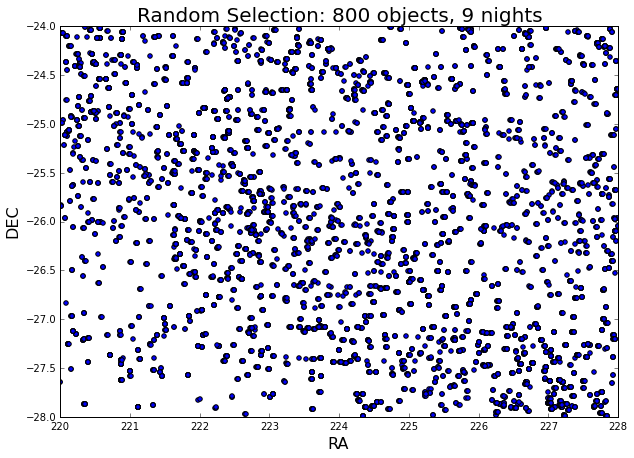

In [18]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec));
fig.savefig("data.jpg")

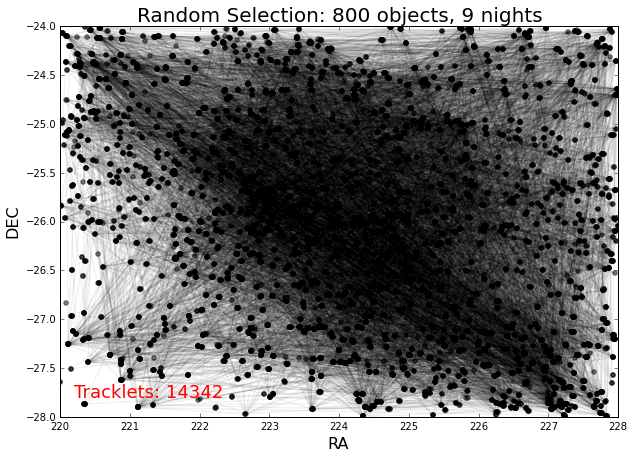

In [19]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)

ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.trackletsByIndex:
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        p1 = objs.iloc[[tracklets[0]]]
        p2 = objs.iloc[[tracklets[1]]]
        ax.arrow(float(p1['ra']), float(p1['dec']), float(p2['ra'])-float(p1['ra']), float(p2['dec'])-float(p1['dec']),
                head_width=HW, head_length=HL, fc='k', ec='k', alpha=A)
        
ax.text(220.2, -27.8, 'Tracklets: ' + str(tracklet_num), size=18, color='r')
fig.savefig("tracklets.jpg")

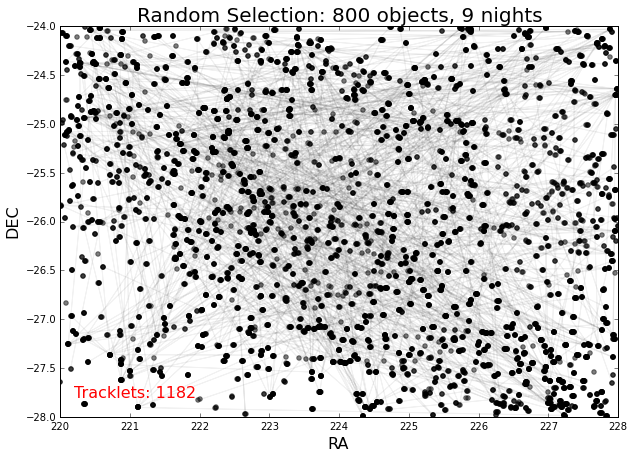

In [20]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.collapsedTracklets:
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        p1 = objs.iloc[[tracklets[0]]]
        p2 = objs.iloc[[tracklets[-1]]]
        ax.arrow(float(p1['ra']), float(p1['dec']), float(p2['ra'])-float(p1['ra']), float(p2['dec'])-float(p1['dec']),
               head_width=HW, head_length=HL, fc='k', ec='k', alpha=A)
        
ax.text(220.2, -27.8, 'Tracklets: ' + str(tracklet_num), size=16, color='r')
fig.savefig("collapsed.jpg")

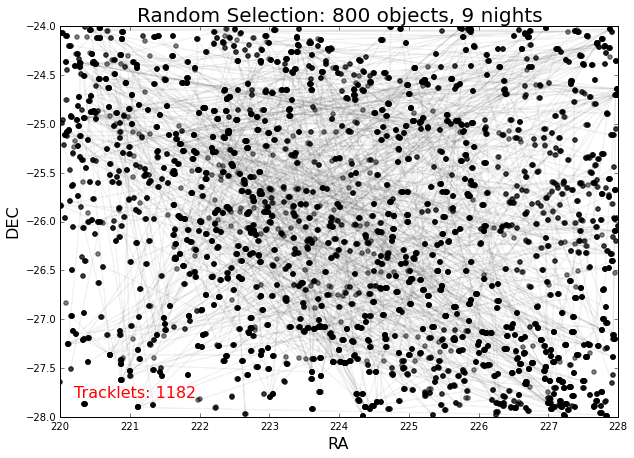

In [21]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.purifiedTracklets:
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        p1 = objs.iloc[[tracklets[0]]]
        p2 = objs.iloc[[tracklets[-1]]]
        ax.arrow(float(p1['ra']), float(p1['dec']), float(p2['ra'])-float(p1['ra']), float(p2['dec'])-float(p1['dec']),
                head_width=HW, head_length=HL, fc='k', ec='k', alpha=A)
        
ax.text(220.2, -27.8, 'Tracklets: ' + str(tracklet_num), size=16, color='r')
fig.savefig("purified.jpg")

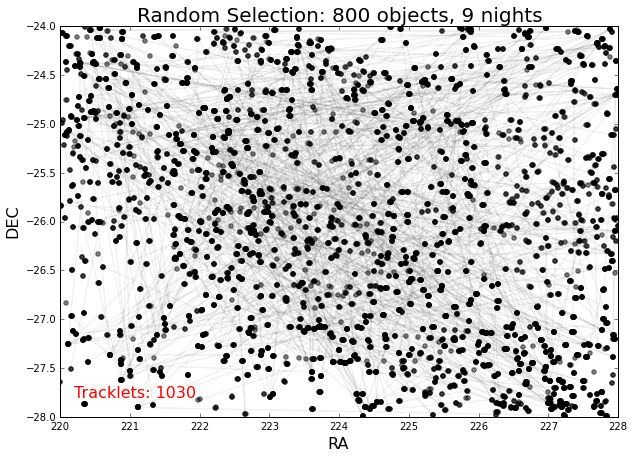

In [22]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

tracklets = []
tracklet_num = 0
for filein in tracker.finalTracklets:
    for line in open(filein, 'r'):
        tracklets = np.fromstring(line, sep=" ", dtype=int)
        tracklet_num += 1
        
        p1 = objs.iloc[[tracklets[0]]]
        p2 = objs.iloc[[tracklets[-1]]]
        ax.arrow(float(p1['ra']), float(p1['dec']), float(p2['ra'])-float(p1['ra']), float(p2['dec'])-float(p1['dec']),
                head_width=HW, head_length=HL, fc='k', ec='k', alpha=A)
        
ax.text(220.2, -27.8, 'Tracklets: ' + str(tracklet_num), size=16, color='r')
fig.savefig("final.jpg")

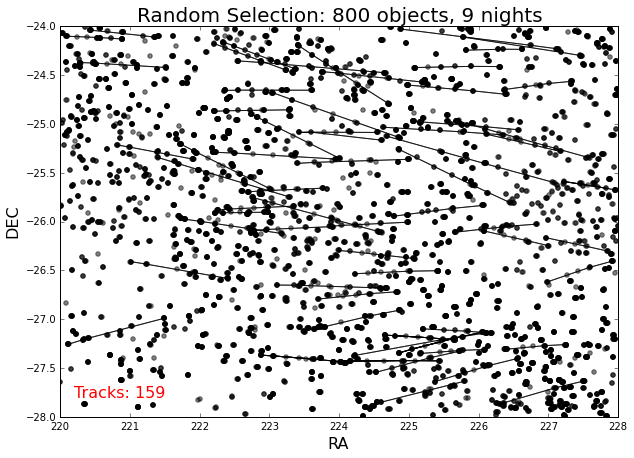

In [24]:
fig, ax = plt.subplots(1,1)
_plotprettymaker(fig, ax)
ax.scatter(np.array(objs.ra), np.array(objs.dec), color='k', alpha=0.5);

track_num = 0

for filein in tracker.tracks:
    for line in open(filein, 'r'):
        track = np.fromstring(line, sep=" ", dtype=int)
        track_num += 1
        ra = []
        dec = []
        
        for d in track:
            ra.append(float(objs.loc[objs['diaid'] == d]['ra']))
            dec.append(float(objs.loc[objs['diaid'] == d]['dec']))
            
        ax.plot(ra, dec, color='k',alpha=0.7)
        
ax.text(220.2, -27.8, 'Tracks: ' + str(track_num), size=16, color='r')
fig.savefig("tracks.jpg")